In [1]:
import numpy as np
import cv2
from skimage import morphology
from sklearn.cluster import MeanShift
import time
from PIL import Image
import matplotlib.pyplot as plt

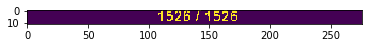

In [2]:
pic = cv2.imread(r'E:\develop\autoLOL\ans\HP1945.png')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
targetImg = cv2.imread('xie.png')
targetImg = cv2.cvtColor(targetImg, cv2.COLOR_BGR2GRAY)
global charList
charList = []
png58 = cv2.imread('shuzi//118.png')
plt.figure('saveName')
plt.imshow(pic)
plt.show()

In [3]:
def findPic(oriImg,targetImg,threshold = 0.8,delay = 0.5,test = False):
    point = [0,0]
    #screen = cv2.cvtColor(np.asarray(screen),cv2.COLOR_RGB2BGR)
    #names = picName.split('&')
    #for name in names:
    
    h, w = targetImg.shape[:2]# rows->h, cols->w
    res = cv2.matchTemplate(oriImg, targetImg, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    maxValue = np.max(res)
    #print(maxValue)
    if maxValue > threshold or True:
        left_top = max_loc  # 左上角
        right_bottom = (left_top[0] + w, left_top[1] + h)  # 右下角
        if test:
            #print(maxValue)
            img = oriImg.copy()
            cv2.rectangle(img, left_top, right_bottom, 255, 1)  # 画出矩形位置
            cv2.imwrite('result.png',img)
        
        return [left_top,right_bottom]

In [4]:
LT,RB = findPic(pic,targetImg,test = True)

In [5]:
def getCharImgs(pic,leftTop,rightBottom,add2List = False):
    #将血条分为左右两侧
    zuoPic = pic[:,0:leftTop[0]-1].copy()
    youPic = pic[:,rightBottom[0] +1:].copy()
    
    #用于判断是否该像素列为空
    zuoLieSum = np.sum(zuoPic,axis = 0)
    youLieSum = np.sum(youPic,axis = 0)
    
    zuoLieSum = clearSmallConnectPoint(zuoLieSum)
    youLieSum = clearSmallConnectPoint(youLieSum)
    
    #print(zuoPic.shape,zuoLieSum.shape)
#     print(youLieSum)
    plt.imshow(zuoPic)
#     plt.show()
    #开始处理右侧数字
    blankLie = 0
    index = 0
    youCharImgs = []
    charStart = -1
    while(blankLie < 8 and index < len(youLieSum)):
        isBlank = youLieSum[index]#0表示此处为空
        #print(index,isBlank)
        if isBlank == 0:
            blankLie += 1
            if charStart != -1:
                charEnd = index
                if charEnd - charStart > 3:
                    if charEnd - charStart < 6:
                        charEnd = charStart + 6
                    youCharImgs.append(youPic[:,charStart:charEnd])
                    #print('char start and end:',charStart,charEnd)
                charStart = -1
        else:
            if charStart == -1:
                charStart = index
                blankLie = 0
        index += 1
    
    #print('开始处理左侧数字')
    #开始处理左侧数字
    blankLie = 0
    index = len(zuoLieSum) - 1
    zuoCharImgs = []
    charEnd = -1 #因为是从右往左看,所以是以end为标志
    while(blankLie < 8 and index > 0):
        isBlank = zuoLieSum[index]
        #print(index,isBlank)
        if isBlank == 0:
            blankLie += 1
            if charEnd != -1:
                charStart = index + 1
                if charEnd - charStart > 3:
                    if charEnd - charStart < 6:
                        charEnd = charStart + 6
                    zuoCharImgs.append(zuoPic[:,charStart:charEnd])
                #print('char start and end:',charStart,charEnd)
                charEnd = -1
        else:
            if charEnd == -1:
                charEnd = index + 1
                blankLie = 0
        index -= 1
                
    for i in range(len(zuoCharImgs)):
        cv2.imwrite(r'shuzi/result{}.png'.format(i),zuoCharImgs[i])
        
    for img in (zuoCharImgs+youCharImgs):
        addCharToList(img)
            
        

In [6]:
def clearSmallConnectPoint(sumList):
    #清理在列和表中出现的一些字符间不正确链接
    #思路是清理长段落都有值的 值为255的段落
    connectList = []#检测每个列左侧有多少个已经非空白的列
    sumList = np.array(sumList)
    notBlankLie = 0
    for i in range(len(sumList)):
        connectList.append(notBlankLie)
        if sumList[i] == 0:
            notBlankLie = 0
        else:
            notBlankLie += 1
    connectList = np.array(connectList)
    
    assert(len(sumList) == len(connectList))
    
    clearBools = 1 - (connectList > 4) * (sumList < 256)
    sumList = sumList * clearBools
    
    return sumList
        
        


In [7]:
def addCharToList(charIn):
    if np.max(charIn) == 0:
        return
    for char in charList:
        if charIn.shape != (11,6):
            print(charIn.shape)
            plt.imshow(charIn)
            plt.show()
            assert False
        #assert not (charIn == png58).all()

        if (charIn == char).all():
            return
    charList.append(charIn)
    print(len(charList),'addChar')

当前i = 1
1 addChar
2 addChar
3 addChar
4 addChar
5 addChar
6 addChar
当前i = 2
当前i = 3
当前i = 4
当前i = 5
当前i = 6
当前i = 7
当前i = 8
当前i = 9
当前i = 10
当前i = 11
当前i = 12
当前i = 13
当前i = 14
当前i = 15
当前i = 16
当前i = 17
当前i = 18
当前i = 19
当前i = 20
7 addChar
8 addChar
9 addChar
当前i = 21
当前i = 22
当前i = 23
当前i = 24
当前i = 25
当前i = 26
当前i = 27
当前i = 28
当前i = 29
当前i = 30
当前i = 31
当前i = 32
当前i = 33
当前i = 34
当前i = 35
当前i = 36
当前i = 37
当前i = 38
当前i = 39
当前i = 40
当前i = 41
当前i = 42
当前i = 43
当前i = 44
当前i = 45
当前i = 46
当前i = 47
当前i = 48
当前i = 49
当前i = 50
当前i = 51
当前i = 52
当前i = 53
当前i = 54
当前i = 55
当前i = 56
当前i = 57
当前i = 58
当前i = 59
当前i = 60
当前i = 61
当前i = 62
当前i = 63
当前i = 64
当前i = 65
当前i = 66
当前i = 67
当前i = 68
当前i = 69
当前i = 70
当前i = 71
当前i = 72
当前i = 73
当前i = 74
当前i = 75
当前i = 76
当前i = 77
当前i = 78
当前i = 79
当前i = 80
当前i = 81
当前i = 82
当前i = 83
当前i = 84
当前i = 85
当前i = 86
当前i = 87
当前i = 88
当前i = 89
当前i = 90
当前i = 91
当前i = 92
当前i = 93
当前i = 94
当前i = 95
当前i = 96
当前i = 97
当前i = 98
当前i = 99
当前i = 100
当前i = 101
当前i = 10

当前i = 773
当前i = 774
当前i = 775
当前i = 776
当前i = 777
当前i = 778
当前i = 779
当前i = 780
当前i = 781
当前i = 782
当前i = 783
当前i = 784
当前i = 785
当前i = 786
当前i = 787
当前i = 788
当前i = 789
当前i = 790
当前i = 791
当前i = 792
当前i = 793
当前i = 794
当前i = 795
当前i = 796
当前i = 797
当前i = 798
当前i = 799
当前i = 800
当前i = 801
当前i = 802
当前i = 803
当前i = 804
当前i = 805
当前i = 806
当前i = 807
当前i = 808
当前i = 809
当前i = 810
当前i = 811
当前i = 812
当前i = 813
当前i = 814
当前i = 815
当前i = 816
当前i = 817
当前i = 818
当前i = 819
当前i = 820
当前i = 821
当前i = 822
当前i = 823
当前i = 824
当前i = 825
当前i = 826
当前i = 827
当前i = 828
当前i = 829
当前i = 830
当前i = 831
当前i = 832
当前i = 833
当前i = 834
当前i = 835
当前i = 836
当前i = 837
当前i = 838
当前i = 839
当前i = 840
当前i = 841
当前i = 842
当前i = 843
当前i = 844
当前i = 845
当前i = 846
当前i = 847
当前i = 848
当前i = 849
当前i = 850
当前i = 851
当前i = 852
当前i = 853
当前i = 854
当前i = 855
当前i = 856
当前i = 857
当前i = 858
当前i = 859
当前i = 860
当前i = 861
当前i = 862
当前i = 863
当前i = 864
当前i = 865
当前i = 866
当前i = 867
当前i = 868
当前i = 869
当前i = 870
当前i = 871
当前i = 872


当前i = 1521
当前i = 1522
当前i = 1523
当前i = 1524
当前i = 1525
当前i = 1526
当前i = 1527
当前i = 1528
当前i = 1529
当前i = 1530
当前i = 1531
当前i = 1532
当前i = 1533
当前i = 1534
当前i = 1535
当前i = 1536
当前i = 1537
当前i = 1538
当前i = 1539
当前i = 1540
当前i = 1541
当前i = 1542
当前i = 1543
当前i = 1544
当前i = 1545
当前i = 1546
当前i = 1547
当前i = 1548
当前i = 1549
当前i = 1550
当前i = 1551
当前i = 1552
当前i = 1553
当前i = 1554
当前i = 1555
当前i = 1556
当前i = 1557
当前i = 1558
当前i = 1559
当前i = 1560
当前i = 1561
当前i = 1562
当前i = 1563
当前i = 1564
当前i = 1565
当前i = 1566
当前i = 1567
当前i = 1568
当前i = 1569
当前i = 1570
当前i = 1571
当前i = 1572
当前i = 1573
当前i = 1574
当前i = 1575
95 addChar
当前i = 1576
当前i = 1577
当前i = 1578
当前i = 1579
当前i = 1580
96 addChar
97 addChar
当前i = 1581
当前i = 1582
当前i = 1583
当前i = 1584
当前i = 1585
当前i = 1586
当前i = 1587
当前i = 1588
当前i = 1589
当前i = 1590
当前i = 1591
当前i = 1592
当前i = 1593
当前i = 1594
当前i = 1595
当前i = 1596
当前i = 1597
当前i = 1598
当前i = 1599
当前i = 1600
当前i = 1601
当前i = 1602
当前i = 1603
当前i = 1604
当前i = 1605
当前i = 1606
当前i = 1607
当前i = 1608

当前i = 2267
当前i = 2268
当前i = 2269
当前i = 2270
当前i = 2271
当前i = 2272
当前i = 2273
当前i = 2274
当前i = 2275
当前i = 2276
当前i = 2277
当前i = 2278
当前i = 2279
当前i = 2280
当前i = 2281
当前i = 2282
当前i = 2283
当前i = 2284
当前i = 2285
当前i = 2286
当前i = 2287
当前i = 2288
当前i = 2289
当前i = 2290
当前i = 2291
当前i = 2292
当前i = 2293
当前i = 2294
当前i = 2295
当前i = 2296
当前i = 2297
当前i = 2298
当前i = 2299
当前i = 2300
当前i = 2301
当前i = 2302
当前i = 2303
当前i = 2304
当前i = 2305
当前i = 2306
当前i = 2307
当前i = 2308
当前i = 2309
当前i = 2310
当前i = 2311
当前i = 2312
当前i = 2313
当前i = 2314
当前i = 2315
当前i = 2316
当前i = 2317
当前i = 2318
当前i = 2319
当前i = 2320
当前i = 2321
当前i = 2322
当前i = 2323
当前i = 2324
当前i = 2325
当前i = 2326
当前i = 2327
当前i = 2328
当前i = 2329
当前i = 2330
当前i = 2331
当前i = 2332
当前i = 2333
当前i = 2334
当前i = 2335
当前i = 2336
当前i = 2337
当前i = 2338
当前i = 2339
当前i = 2340
当前i = 2341
当前i = 2342
当前i = 2343
当前i = 2344
当前i = 2345
当前i = 2346
当前i = 2347
当前i = 2348
当前i = 2349
当前i = 2350
当前i = 2351
当前i = 2352
当前i = 2353
当前i = 2354
当前i = 2355
当前i = 2356
当前i = 2357

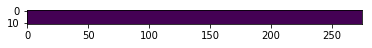

In [8]:
#getCharImgs(pic,LT,RB)
i = 1
while True:
    pic = cv2.imread(r'E:\develop\autoLOL\ans\HP{}.png'.format(i))
    if pic is None:
        break
    print('当前i = {}'.format(i))
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    LT,RB = findPic(pic,targetImg)
    getCharImgs(pic,LT,RB,True)
    i += 1
    #print(i,len(charList))

In [9]:
i = 0
for char in charList:
    cv2.imwrite('shuzi//{}.png'.format(i),char)
    i += 1